In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Dense, Input, Dropout
from keras.models import Model, Sequential

2025-08-10 21:16:36.043541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754871396.062509   18621 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754871396.068749   18621 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754871396.084544   18621 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754871396.084567   18621 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754871396.084569   18621 computation_placer.cc:177] computation placer alr

In [2]:
# Importação do Dataset
# Label	  Description
# 0	      T-shirt/top
# 1	      Trouser
# 2	      Pullover
# 3	      Dress
# 4	      Coat
# 5	      Sandal
# 6	      Shirt
# 7	      Sneaker
# 8	      Bag
# 9	      Ankle boot
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Normalização dos dados
(x_train, x_test) = (x_train / 255, x_test / 255)

In [4]:
# Transformação do vetor 28x28 por um vetor achatado unidimensional de 784 índices (ou pixels)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
# Criação de um novo vetor de treinamento com ruído para avaliação do modelo para casos com ruídos
factor = 0.3
x_train_noisy = x_train + factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

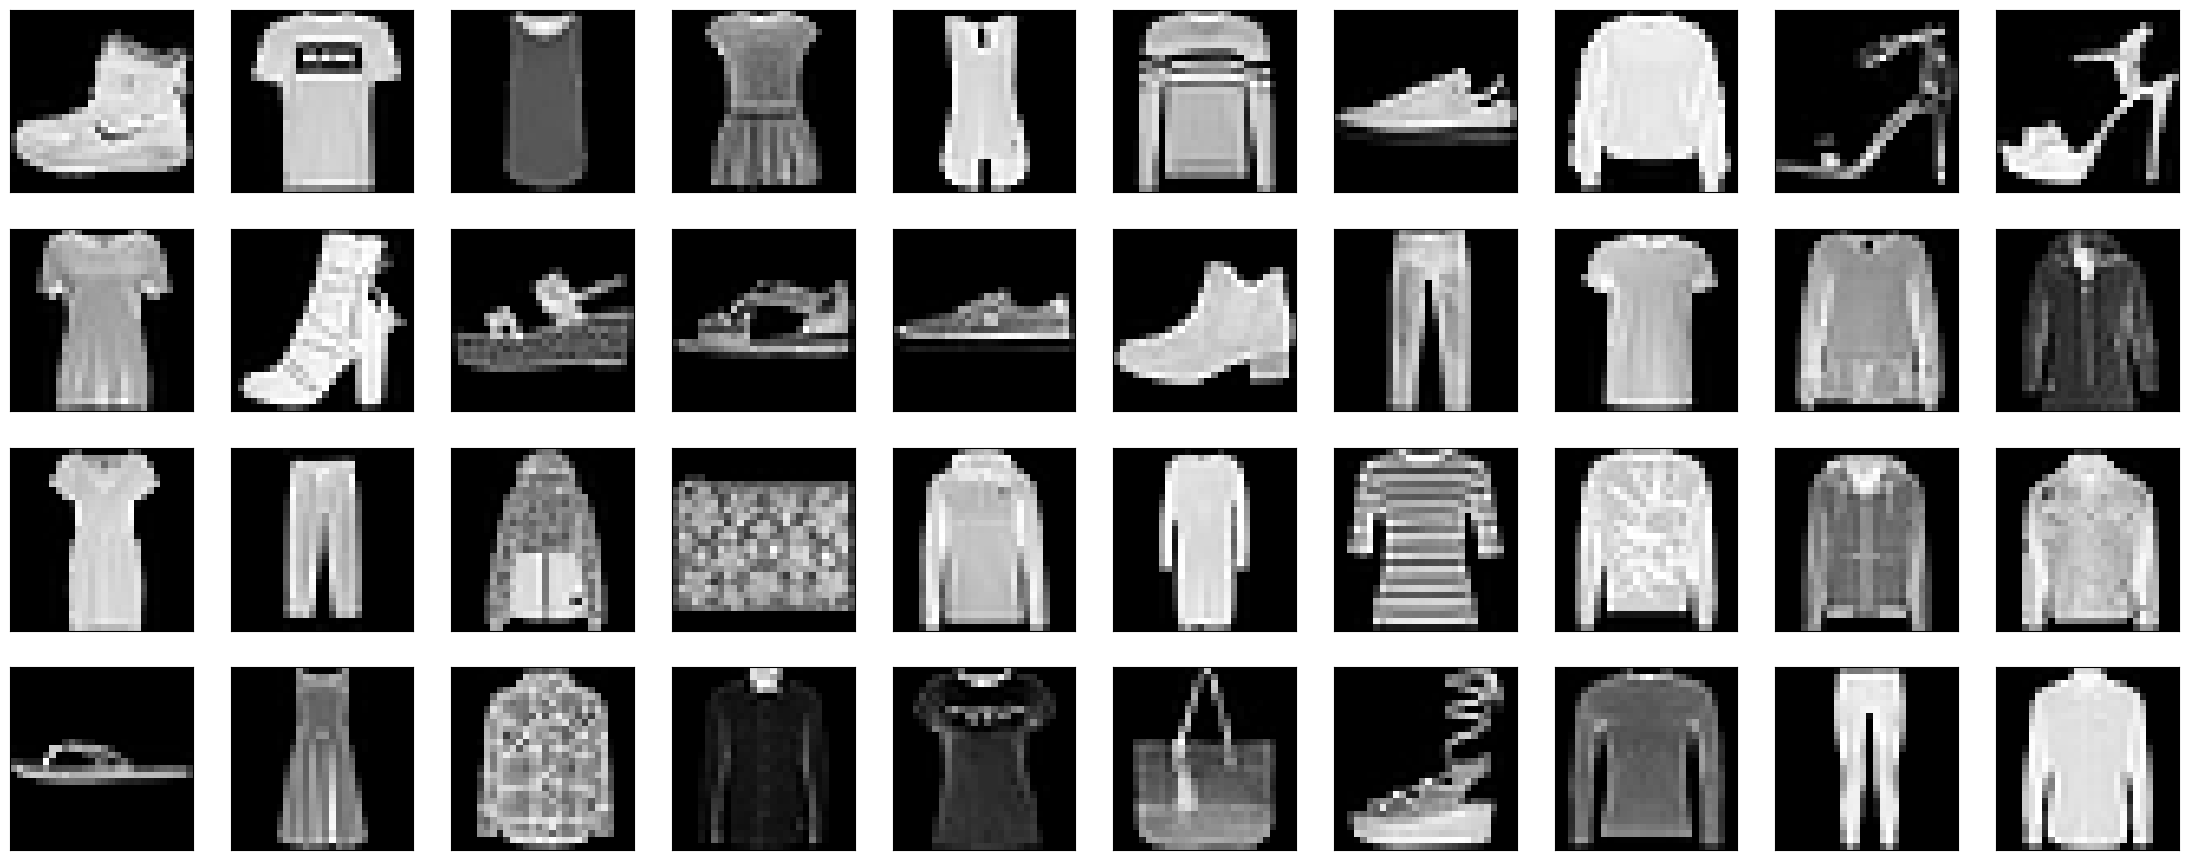

In [6]:
n = 40
plt.figure(figsize=(28, 28))
for i in range(n):
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(x_train[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
plt.show()

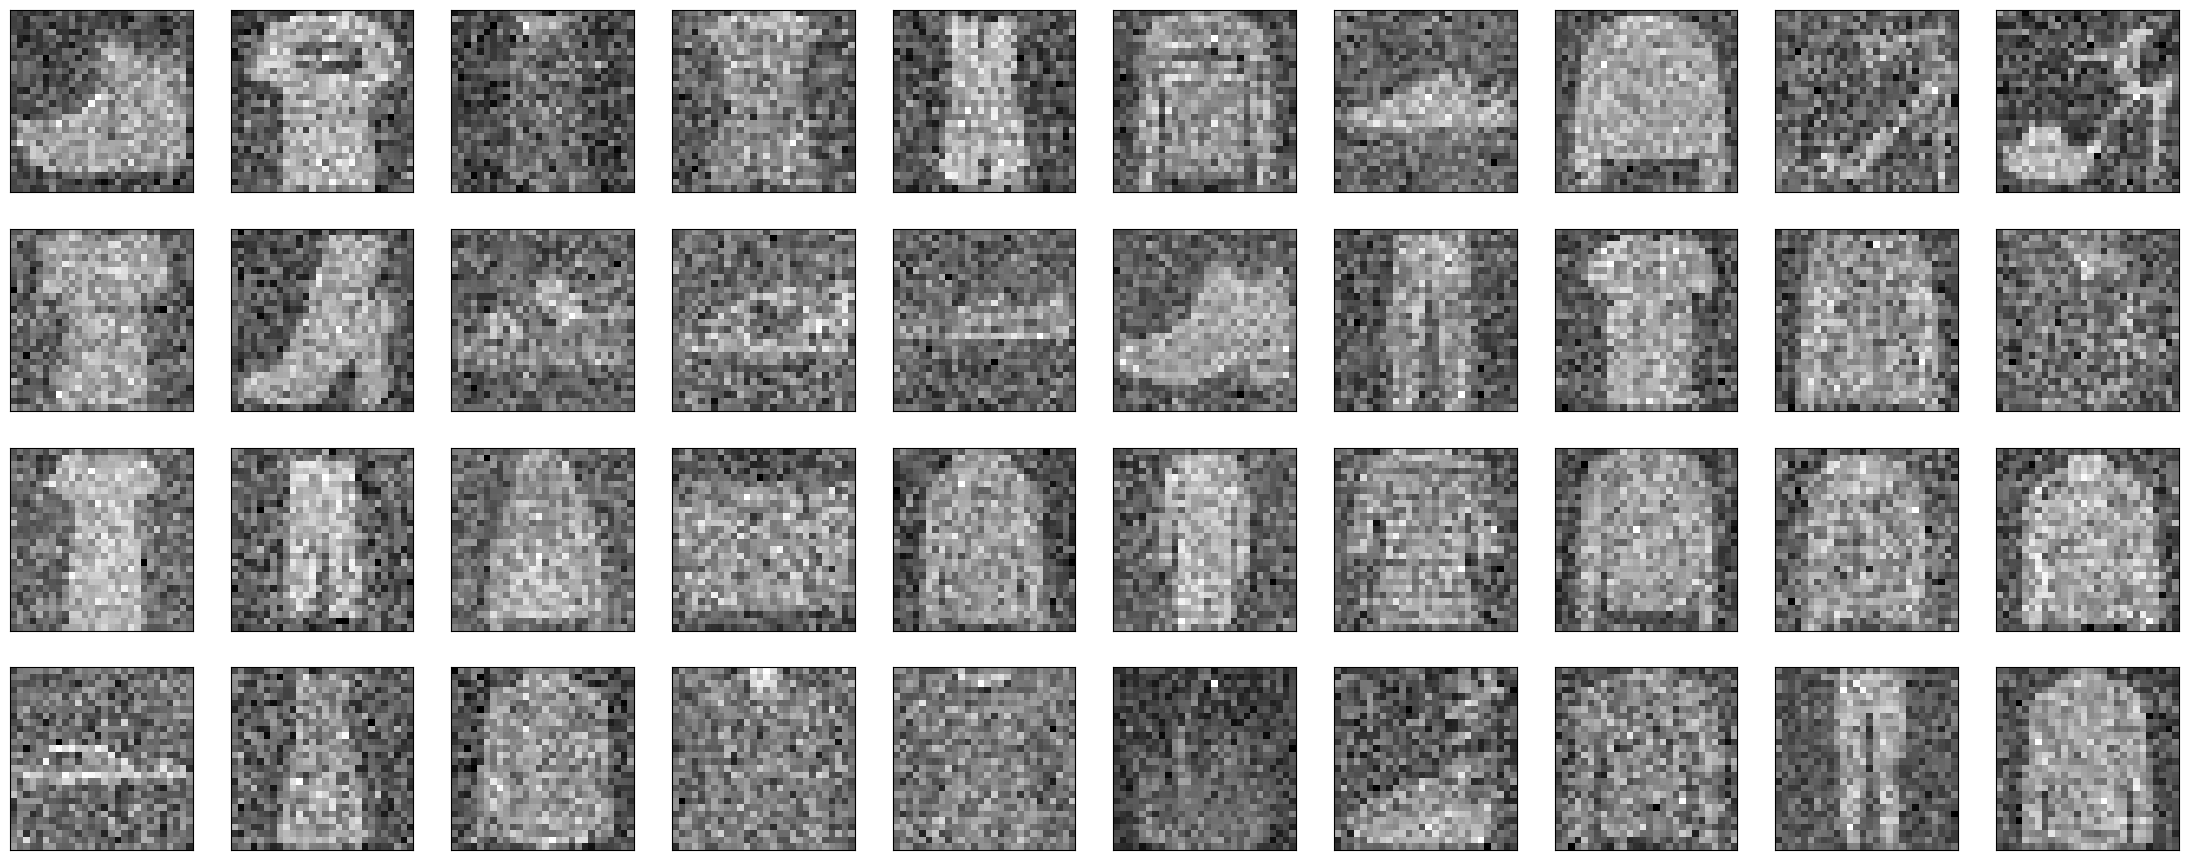

In [7]:
n = 40
plt.figure(figsize=(28, 28))
for i in range(n):
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(x_train_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
plt.show()

In [31]:
import keras

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.3805 - val_loss: 0.3220
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3101 - val_loss: 0.3056
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3007 - val_loss: 0.2992
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2954 - val_loss: 0.2957
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2911 - val_loss: 0.2914
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2880 - val_loss: 0.2891
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2859 - val_loss: 0.2871
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2841 - val_loss: 0.2856
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2829 - val_loss: 0.2850
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2816 - val_loss: 0.2838
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2805 - val_loss: 0.2836
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

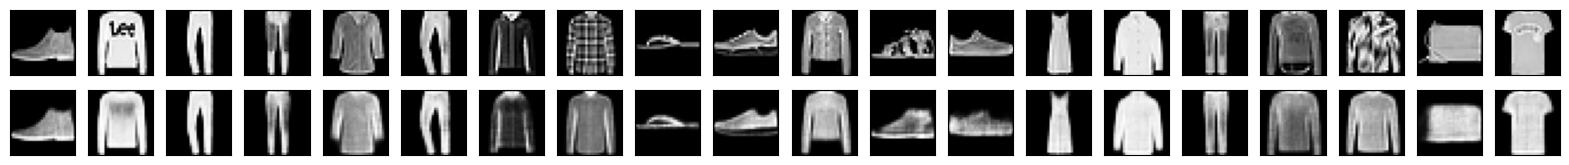

In [67]:

# Construção do modelo de rede neural Autoencoders
n_latent = 50

model = Sequential(
  [
    # Codificador (Encoder)
    Dense(units=600, input_dim=x_train.shape[1], activation='relu'),
    Dense(units=400, activation='relu'),
    Dense(units=300, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=n_latent, activation='relu'),

    # Decodificador (Decoder)
    Dense(units=200, activation='relu'),
    Dense(units=300, activation='relu'),
    Dense(units=400, activation='relu'),
    Dense(units=600, activation='relu'),
    Dense(units=x_train.shape[1], activation=keras.activations.sigmoid)
  ]
)
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy)

# Treinamento do modelo
model.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Teste do modelo
encoded_imgs = model.predict(x_test)

# Comparativo do resultado das imagens processadas com as imagens originais

n=20
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(4, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ax = plt.subplot(4, n, n + i + 1)
  plt.imshow(encoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
plt.show()

In [68]:
# Codificando e decodificando as imagens de teste com ruído
encoded_imgs = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


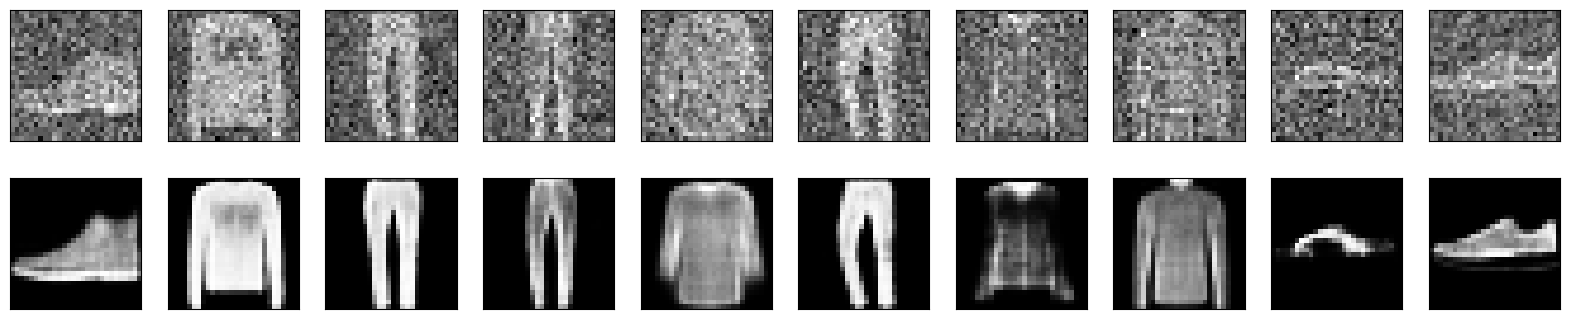

In [69]:
# Visualização de algumas imagens originais com ruído e reconstituídas
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # Imagem de entrada com ruído
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  # Imagem reconstituída com redução de ruído
  ax = plt.subplot(2, n, i + 1 + n)
  ax.imshow(encoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [70]:
# Classificação das imagens

# Dropout = 0.45
dropout = 0.45
num_labels = len(np.unique(y_train))


model2 = Sequential()
model2.add(Dense(units=500, input_dim=x_train.shape[1], activation='relu'))
model2.add(Dropout(dropout)) # Essa camada ajuda a evitar overfitting durante o treinamento, desligando aleatoriamente um certo número de neurônios durante cada passagem de treinamento
model2.add(Dense(units=200, activation='relu'))
model2.add(Dropout(dropout))
# A função de ativação é softmax pois neste caso temos 10 rótulos como resultado da camada de saída
model2.add(Dense(units=num_labels, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
# Treinamento do modelo
model2.fit(x_train, y_train, epochs=40, batch_size=256)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7585 - loss: 0.6784
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8364 - loss: 0.4574
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8506 - loss: 0.4157
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8575 - loss: 0.3924
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8637 - loss: 0.3753
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8691 - loss: 0.3579
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8717 - loss: 0.3515
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8766 - loss: 0.3394
Epoch 9/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8780 - loss: 0.3327
Epoch 10/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8808 - loss: 0.3222
Epoch 11/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8818 - loss: 0.3207
Epoch 12/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

In [72]:
# Apresentação de métricas do modelo
loss, acc = model2.evaluate(x_test, y_test)
print("Teste de Acurácia Classificação sem Ruído: %.1f%%\n" % (100.0 * acc))
loss, acc = model2.evaluate(x_test_noisy, y_test)
print("Teste de Acurácia Classificação com Ruído: %.1f%%\n" % (100.0 * acc))
loss, acc = model2.evaluate(encoded_imgs, y_test)
print("Teste de Acurácia Classificação das Imagens Recuperadas do ruído: %.1f%%" % (100.0 * acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8949 - loss: 0.3056
Teste de Acurácia Classificação sem Ruído: 89.5%

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8100 - loss: 0.6992
Teste de Acurácia Classificação com Ruído: 81.0%

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8001 - loss: 0.6800
Teste de Acurácia Classificação das Imagens Recuperadas do ruído: 80.0%


In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Avaliação da Classificação
Acurácia: 0.8949
MSE:  1.4042
Matriz de confusão das amostras não apresentadas no treinamento:
 [[865   3  19  27   1   1  79   0   5   0]
 [  1 977   1  16   2   0   2   0   1   0]
 [ 13   0 855  14  72   0  46   0   0   0]
 [ 16   8  10 928  20   0  14   0   4   0]
 [  0   0 129  49 767   0  54   0   1   0]
 [  0   0   0   0   0 972   0  19   1   8]
 [133   2  95  36  54   0 674   0   6   0]
 [  0   0   0   0   0   6   0 978   0  16]
 [  3   0   4   5   1   1   3   3 980   0]
 [  0   0   0   0   0   8   1  38   0 953]]

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.77      0.85      0.81      1000
       Dress       0.86      0.93      0.89      1000
        Coat       0.84      0.77      0.80      1000
      

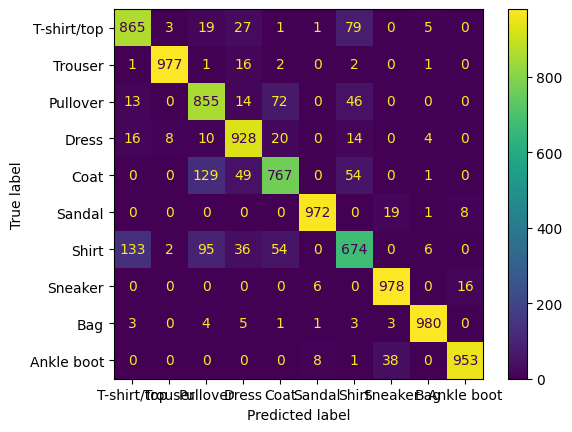

In [75]:
y_pred = model2.predict(x_test)

# Converter as previsões para classes
y_pred = np.argmax(y_pred, axis=1)

print("Avaliação da Classificação")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")
print("")
relatorio = classification_report(y_test, y_pred, target_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)
print("")

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])
cm_display.plot()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Avaliação da Classificação
Acurácia: 0.81
MSE:  2.2946
Matriz de confusão das amostras não apresentadas no treinamento:
 [[793   8  13  65   5   1 107   0   8   0]
 [  9 956   3  26   2   0   3   0   1   0]
 [ 24   5 770  22  84   1  85   0   9   0]
 [ 39  21  16 869  18   0  30   1   6   0]
 [  2   2 199  62 638   1  87   0   9   0]
 [  1   0   1   1   0 949   3  25   6  14]
 [167   8 123  63  95   1 524   0  18   1]
 [  1   1   4   1   0 156   6 775  16  40]
 [ 10   1   7   8   3   7  22   4 938   0]
 [  0   0   0   0   0  57   1  54   0 888]]

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

 T-shirt/top       0.76      0.79      0.78      1000
     Trouser       0.95      0.96      0.96      1000
    Pullover       0.68      0.77      0.72      1000
       Dress       0.78      0.87      0.82      1000
        Coat       0.76      0.64      0.69      1000
      Sa

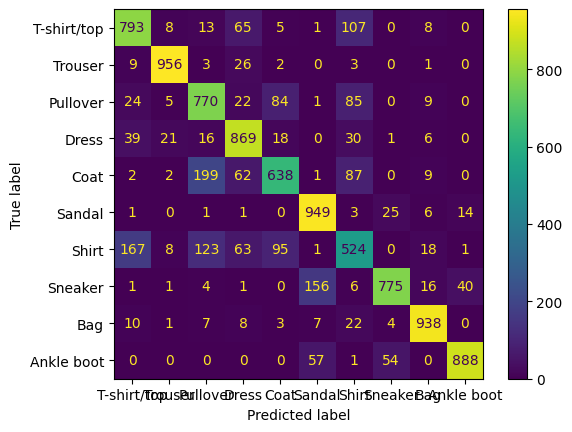

In [76]:
y_pred = model2.predict(x_test_noisy)

# Converter as previsões para classes
y_pred = np.argmax(y_pred, axis=1)

print("Avaliação da Classificação")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")
print("")
relatorio = classification_report(y_test, y_pred, target_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)
print("")

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])
cm_display.plot()
plt.show()